In [1]:
from glob import glob
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 이미지 load

In [2]:
image_datas = glob('C:\\Users\\admin\\PycharmProjects\\오산시\\흰가루병\\*.png')

In [3]:
whilte_X = []
for imagename in image_datas:
  image = Image.open(imagename)
  image = image.resize((128,128))
  image = np.array(image)
  whilte_X.append(image)

In [4]:
image_datas = glob('C:\\Users\\admin\\PycharmProjects\\오산시\\모자이크병\\*.png')

In [5]:
mosaic_X = []
for imagename in image_datas:
  image = Image.open(imagename)
  image = image.resize((128,128))
  image = np.array(image)
  mosaic_X.append(image)

## 전처리

In [22]:
whilte_df = pd.read_csv('C:\\Users\\admin\\PycharmProjects\\오산시\\흰가루병\\흰가루병 데이터.csv')
mosaic_df = pd.read_csv('C:\\Users\\admin\\PycharmProjects\\오산시\\모자이크병\\/모자이크병 데이터.csv')

In [23]:
whilte_df = whilte_df.drop([1685])
mosaic_df = mosaic_df.drop([1997])

In [24]:
white = len(whilte_df[whilte_df['실제판독명(Act_Diag)'] == '흰가루병'])
white_alpha = len(whilte_df[whilte_df['실제판독명(Act_Diag)'] != '흰가루병'])
print('흰가루병 이미지 데이터 개수:', white)
print('흰가루병 + 다른병 이미지 데이터 개수:', white_alpha)

흰가루병 이미지 데이터 개수: 907
흰가루병 + 다른병 이미지 데이터 개수: 2774


In [25]:
len(whilte_df['실제판독명(Act_Diag)'].unique())

67

In [26]:
mosaic = len(mosaic_df[mosaic_df['실제판독명(Act_Diag)'] == '모자이크병'])
mosaic_alpha = len(mosaic_df[mosaic_df['실제판독명(Act_Diag)'] != '모자이크병'])
print('모자이크병 이미지 데이터 개수:', mosaic)
print('모자이크병 + 다른병 이미지 데이터 개수:', mosaic_alpha)

모자이크병 이미지 데이터 개수: 509
모자이크병 + 다른병 이미지 데이터 개수: 2017


In [27]:
len(mosaic_df['실제판독명(Act_Diag)'].unique())

68

In [28]:
mosaic_df[['파일명(File_Name)', '파일저장경로(Directory)', '실제판독명(Act_Diag)']]

,파일명(File_Name),파일저장경로(Directory),실제판독명(Act_Diag)
0,a1_26(1).jpg,https://www.bigdatahub.go.kr/images/disease/,모자이크병+그을음병
1,a1_26(2).jpg,https://www.bigdatahub.go.kr/images/disease/,모자이크병+그을음병
2,a1_37(1).jpg,https://www.bigdatahub.go.kr/images/disease/,흰가루병+모자이크병
3,a1_37(2).jpg,https://www.bigdatahub.go.kr/images/disease/,흰가루병+모자이크병
4,a1_40(1).jpg,https://www.bigdatahub.go.kr/images/disease/,노균병+모자이크병+흰가루병
...,...,...,...
2522,k1_100(5).jpg,https://www.bigdatahub.go.kr/images/disease/,모자이크병
2523,k1_100(6).jpg,https://www.bigdatahub.go.kr/images/disease/,모자이크병
2524,k1_100(7).jpg,https://www.bigdatahub.go.kr/images/disease/,모자이크병
2525,k1_100(8).jpg,https://www.bigdatahub.go.kr/images/disease/,모자이크병


In [40]:
white_sum = 0 
mosaic_sum = 0 
both_sum = 0 

Y = []
for i in whilte_df['실제판독명(Act_Diag)']:
    if '흰가루병' in i and '모자이크병' in i:
        Y.append([0,0,1])
        both_sum += 1 
    elif '흰가루병' in i:
        Y.append([1,0,0])
        white_sum += 1 

In [41]:
for i in mosaic_df['실제판독명(Act_Diag)']:
    if '흰가루병' in i and '모자이크병' in i:
        Y.append([0,0,1])
        both_sum += 1 
    elif '모자이크병' in i:
        Y.append([0,1,0])
        mosaic_sum += 1 
    elif '모자이크' in i:
        Y.append([0,1,0])
        mosaic_sum += 1 

In [42]:
print('흰가루:', white_sum,'모자이크:',mosaic_sum, '모자이크+흰가루:', both_sum)

흰가루: 3096 모자이크: 1941 모자이크+흰가루: 1170


In [35]:
whilte_X = np.array(whilte_X)
mosaic_X = np.array(mosaic_X)
X = np.concatenate((whilte_X, mosaic_X), axis=0)
Y = np.array(Y)

#정규화
X = X / 255.0

NameError: name 'whilte_X' is not defined

In [36]:
print('X shape:',np.shape(X))
print('Y shape:',np.shape(Y))

NameError: name 'X' is not defined

## Model

In [40]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from keras.layers import Flatten, Convolution2D, MaxPooling2D, AveragePooling2D
from keras.models import load_model

In [41]:
# train set, test set 분할 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, random_state=30)

In [42]:
# train set, test set 분할 후 shape 
x_train_shape = np.shape(X_train)
y_train_shape = np.shape(Y_train)
x_test_shape = np.shape(X_test)
y_test_shape = np.shape(Y_test)

print('x_train:',x_train_shape, 'y_train:',y_train_shape)
print('x_test:',x_test_shape, 'y_test:',y_test_shape)

x_train: (4655, 128, 128, 3) y_train: (4655, 3)
x_test: (1552, 128, 128, 3) y_test: (1552, 3)


In [46]:
model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'SAME', 
                        input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(3,3), padding='SAME'))
model.add(Dropout(0.2))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', padding= 'SAME'))
model.add(MaxPooling2D(pool_size=(3,3), padding='SAME'))
model.add(Dropout(0.2))
model.add(Convolution2D(filters=128, kernel_size=(3,3), activation='relu', padding= 'SAME'))
model.add(MaxPooling2D(pool_size=(3,3), padding='SAME'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
  
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
146/146 [==============================] - 30s 206ms/step - loss: 0.5859 - accuracy: 0.5249 - val_loss: 0.5503 - val_accuracy: 0.6340
Epoch 2/50
146/146 [==============================] - 29s 200ms/step - loss: 0.5241 - accuracy: 0.6006 - val_loss: 0.5503 - val_accuracy: 0.6140
Epoch 3/50
146/146 [==============================] - 29s 197ms/step - loss: 0.5171 - accuracy: 0.6095 - val_loss: 0.4932 - val_accuracy: 0.6398
Epoch 4/50
146/146 [==============================] - 29s 198ms/step - loss: 0.4822 - accuracy: 0.6336 - val_loss: 0.5043 - val_accuracy: 0.6430
Epoch 5/50
146/146 [==============================] - 29s 202ms/step - loss: 0.4672 - accuracy: 0.6517 - val_loss: 0.4750 - val_accuracy: 0.6540
Epoch 6/50
146/146 [==============================] - 29s 200ms/step - loss: 0.4626 - accuracy: 0.6580 - val_loss: 0.4459 - val_accuracy: 0.6759
Epoch 7/50
146/146 [==============================] - 29s 197ms/step - loss: 0.4436 - accuracy: 0.6753 - val_loss: 0.4393 - val_ac

In [47]:
test_loss, test_acc = model.evaluate(X_test, Y_test)

print('테스트 loss:', test_loss)
print('테스트 정확도:', test_acc)

49/49 [==============================] - 2s 40ms/step - loss: 0.5291 - accuracy: 0.8209
테스트 loss: 0.5291454195976257
테스트 정확도: 0.8208763003349304


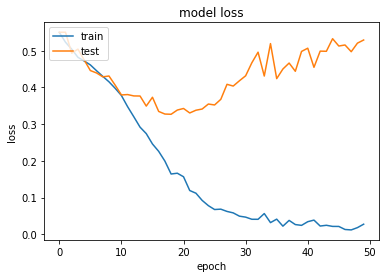

In [50]:
#loss plot 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

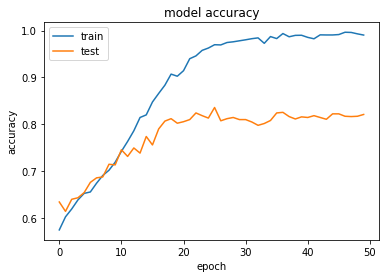

In [51]:
#accuracy plot 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()